In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
import keras

Using TensorFlow backend.


In [3]:
import tensorflow

In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
data = pd.read_csv('rotten_tomatoes_reviews.csv')
data = data.iloc[:100000,:] 
data.head()

,Freshness,Review
0,1,"Manakamana doesn't answer any questions, yet ..."
1,1,Wilfully offensive and powered by a chest-thu...
2,0,It would be difficult to imagine material mor...
3,0,Despite the gusto its star brings to the role...
4,0,If there was a good idea at the core of this ...


## LSTM & Embedding

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score

In [8]:
text = data['Review'].values
sentiment = data['Freshness'].values

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

In [10]:
tokenizer

In [11]:
sequence_text = tokenizer.texts_to_sequences(text)

In [12]:
sequence_text = pad_sequences(sequence_text,padding="post")

In [13]:
x_train , x_test , y_train ,y_test = train_test_split(sequence_text,sentiment,
                                                      test_size=0.3,random_state=11)

In [14]:
print(f"""
X Train :{x_train.shape}
X TEST : {x_test.shape}
Y TRAIN : {y_train.shape}
Y TEST  : {y_test.shape}
""")


X Train :(70000, 54)
X TEST : (30000, 54)
Y TRAIN : (70000,)
Y TEST  : (30000,)



In [15]:
VOCAB_SIZE = len(tokenizer.word_index)+1
EMBEDDING_VEC = 30

In [16]:
model = tf.keras.Sequential([
    L.Embedding(VOCAB_SIZE,EMBEDDING_VEC, input_length=x_train.shape[1]),
    L.Bidirectional(L.LSTM(128,return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(128, activation="relu"),
    L.Dropout(0.4),
    L.Dense(2)
    ])
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy']
             )

In [17]:
model.fit(x_train,y_train , validation_data=(x_test,y_test),batch_size=32
          ,epochs=5)

Train on 70000 samples, validate on 30000 samples
Epoch 1/5
70000/70000 [==============================] - 144s 2ms/sample - loss: 0.4981 - accuracy: 0.7497 - val_loss: 0.4208 - val_accuracy: 0.8065
Epoch 2/5
70000/70000 [==============================] - 144s 2ms/sample - loss: 0.3232 - accuracy: 0.8630 - val_loss: 0.4318 - val_accuracy: 0.8091
Epoch 3/5
70000/70000 [==============================] - 145s 2ms/sample - loss: 0.2117 - accuracy: 0.9156 - val_loss: 0.4883 - val_accuracy: 0.8076
Epoch 4/5
70000/70000 [==============================] - 154s 2ms/sample - loss: 0.1378 - accuracy: 0.9473 - val_loss: 0.6406 - val_accuracy: 0.7984
Epoch 5/5
70000/70000 [==============================] - 154s 2ms/sample - loss: 0.0939 - accuracy: 0.9647 - val_loss: 0.7188 - val_accuracy: 0.7950


In [18]:
predictions = model.predict_classes(x_test)

In [19]:
print(f"The accuracy of the model is : {accuracy_score(y_test,predictions)*100}%")

The accuracy of the model is : 79.49666666666667%


In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
cm = confusion_matrix(y_test,predictions)
cm

array([[11673,  3386],
       [ 2765, 12176]], dtype=int64)

In [21]:
print(classification_report(y_test, predictions, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.81      0.78      0.79     15059
Good Reviews       0.78      0.81      0.80     14941

    accuracy                           0.79     30000
   macro avg       0.80      0.80      0.79     30000
weighted avg       0.80      0.79      0.79     30000



Text(69.0, 0.5, 'Actual')

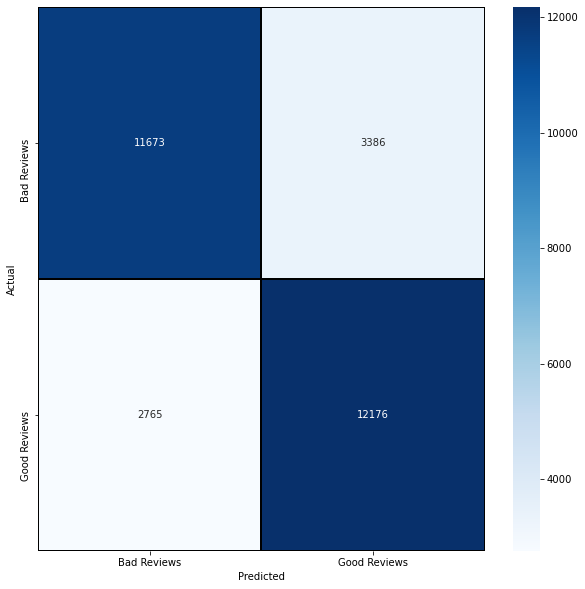

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Bad Reviews','Good Reviews'] , yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [23]:
x_train.shape

(70000, 54)

In [24]:
x_test.shape

(30000, 54)

In [25]:
history = model.fit(x_train,y_train , validation_data=(x_test,y_test),batch_size=32
          ,epochs=2)

Train on 70000 samples, validate on 30000 samples
Epoch 1/2
70000/70000 [==============================] - 146s 2ms/sample - loss: 0.0636 - accuracy: 0.9772 - val_loss: 1.0170 - val_accuracy: 0.7925
Epoch 2/2
70000/70000 [==============================] - 148s 2ms/sample - loss: 0.0442 - accuracy: 0.9841 - val_loss: 0.9337 - val_accuracy: 0.7888


In [26]:
predictions = model.predict_classes(x_test)

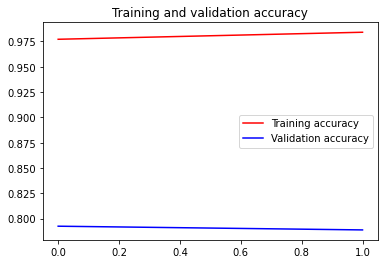

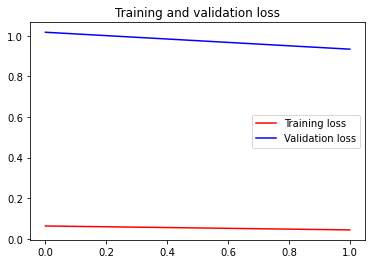

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [30]:
print('Training Accuracy: {}'.format(max(acc)))
print('Validation Accuracy: {}'.format(max(val_acc)))

Training Accuracy: 0.9840999841690063
Validation Accuracy: 0.7924666404724121
